## Chapter 5: Plotting with Object Oriented API

### Plotting a correlation matrix using pyplot API and Object Oriented API

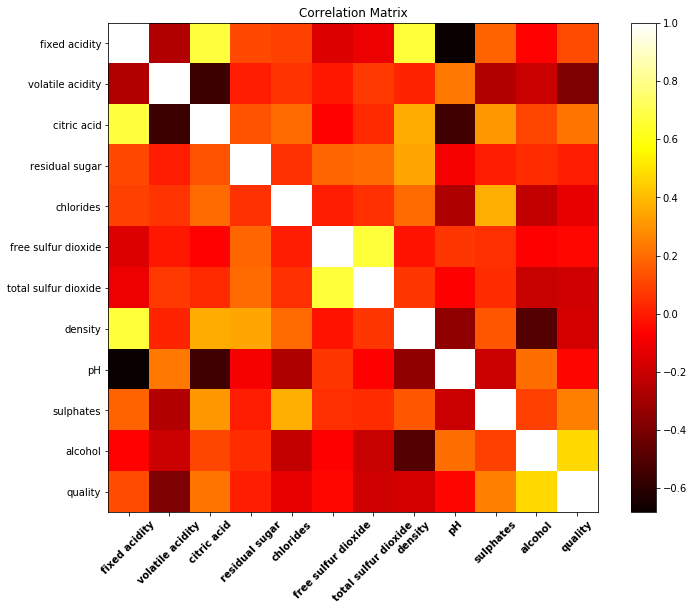

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from a csv file into pandas data frame
wine_quality = pd.read_csv('winequality.csv', delimiter=';')
# Get correlation matrix of all attributes of wine_quality
corr = wine_quality.corr()

plt.figure(figsize=(12,9))
plt.imshow(corr,cmap='hot')
plt.colorbar()

plt.title('Correlation Matrix')
plt.xticks(range(len(corr)),corr.columns, fontsize=10, fontweight='bold',rotation=45)
plt.yticks(range(len(corr)),corr.columns)

plt.show()

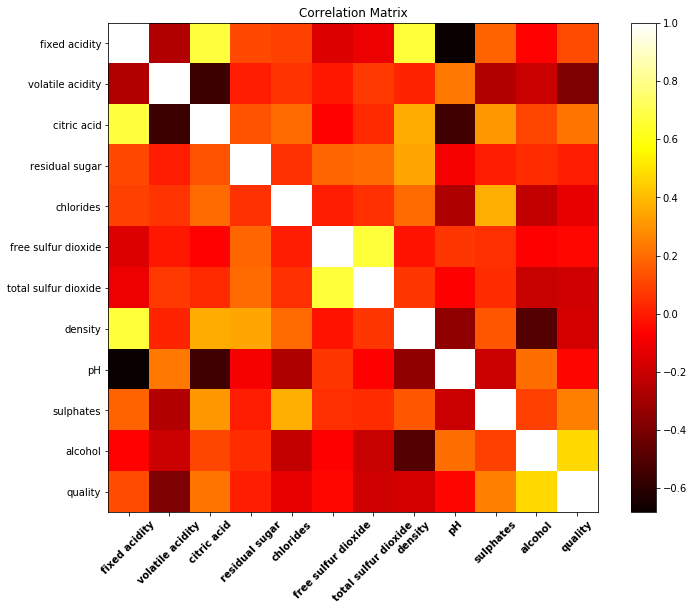

In [2]:
%matplotlib inline
import pandas as pd
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from IPython.core.display import display

# Read the data from a csv file into pandas data frame
wine_quality = pd.read_csv('winequality.csv', delimiter=';')
# Get correlation matrix of all attributes of wine_quality
corr = wine_quality.corr()

fig = Figure(figsize=(12,9))
# A canvas must be manually attached to the figure (pyplot would automatically
# do it).  This is done by instantiating the canvas with the figure as
# argument.
FigureCanvas(fig)
axs = fig.add_subplot(111)
corimage = axs.imshow(corr,cmap='hot')
fig.colorbar(corimage)

fontd = {'fontsize': 10,
         'fontweight': 'bold',
         'rotation': 45}
axs.set(xticks=range(len(corr)), yticks=range(len(corr)), title='Correlation Matrix')
axs.set_xticklabels(corr.columns, fontdict=fontd)
axs.set_yticklabels(corr.columns)

display(fig)

### Plotting Patches using Object Oriented API

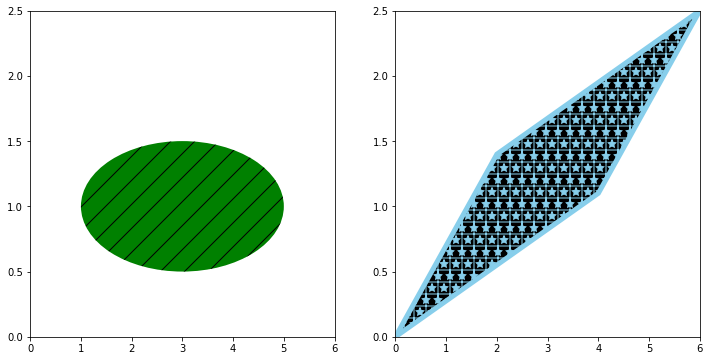

In [3]:
%matplotlib inline
from IPython.core.display import display
from matplotlib.backends import backend_agg
from matplotlib.patches import Ellipse, Polygon

figure_manager = backend_agg.new_figure_manager(1, figsize=(12,6))
fig = figure_manager.canvas.figure

axs1 = fig.add_subplot(121)
# Define ellipse with centre=(3, 1.0), width=4, height=1.0
axs1.add_patch(Ellipse((3, 1.0), 4, 1.0, hatch='/', facecolor='g')) 
axs1.set_xlim((0, 6))
axs1.set_ylim((0, 2.5))

axs2 = fig.add_subplot(122)
axs2.add_patch(Polygon([[0, 0], [4, 1.1], [6, 2.5], [2, 1.4]], 
                        lw=5, facecolor='k', edgecolor='skyblue', hatch='+*')) #Changed for 3.0
axs2.set_xlim((0, 6))
axs2.set_ylim((0, 2.5))

display(fig)

### Plotting Collections using Object Oriented API

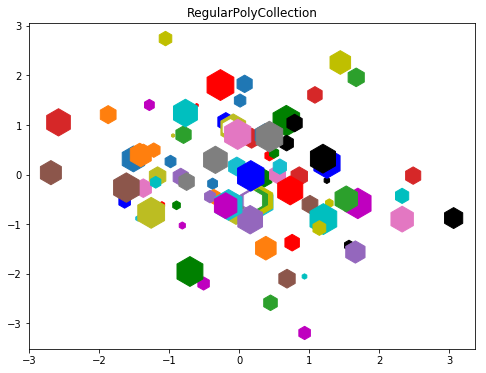

In [4]:
%matplotlib inline
from matplotlib import collections
from IPython.core.display import display
from matplotlib.backends import backend_agg
import numpy as np

nsizes = 50      #number of different sizes to be used to plot the items in the collection
npts = 100       # number of items in the collection

r = np.arange(nsizes)
theta = np.linspace(0, 2*np.pi, nsizes)
xx = r * np.sin(theta)

# offset co-ordinates where the items of the collection would be plotted
rs = np.random.RandomState([125])
xo = rs.randn(npts)
yo = rs.randn(npts)
xyo = list(zip(xo, yo))

figure_manager = backend_agg.new_figure_manager(1, figsize=(8,6))
fig = figure_manager.canvas.figure
axs1 = fig.add_subplot(111)
# 6-sided regular polygons
col = collections.RegularPolyCollection(6,
                                        sizes=np.fabs(xx) * 20, offsets=xyo,
                                        transOffset=axs1.transData)
axs1.add_collection(col, autolim=True)
# Make a list of colors cycle.
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 
          'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
col.set_color(colors)

axs1.autoscale_view()
axs1.set_title('RegularPolyCollection')

display(fig)